# Assignment 2: Joukowski Transformation
## 1. Complex numbers in Python

In [1]:
import numpy
import math
from matplotlib import pyplot

%matplotlib inline
%run ./definitions.ipynb

In [2]:
a = 3
b = 3
z = a + b*1j
print('z = ',z)
print('The type of variable is ',type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


### Exercises:

In [3]:
ans1 = (2.75 + 3.69*1j) * (8.55 - 6.13*1j)
ans2 = 1.4 * numpy.exp(5.32*1j)
ans3 = (7.51 - 9.15*1j)/(4.43 + 9.64*1j)
print('1. ',ans1)
print('2. ',ans2)
print('3. ',ans3)

1.  (46.1322+14.692000000000004j)
2.  (0.799270785858-1.1494199454j)
3.  (-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski Transform
Define a function that takes z and c as parameters, and returns the Joukowski transformation of z

In [4]:
def joukowski(z,c):
    """
    write the stuff
    """
    xi = z + c**2/z
    
    return xi

### Exercises:
We will generate several patterns using the Joukowski Transform. 

** Part 1 **

In the first example of the Joukowski transform we plot a cicle with a radius larger than c centered on the origin on the z-plane. When transformed to the $\xi$-plane, we see in the next couple of cells that it takes the shape of an ellipse

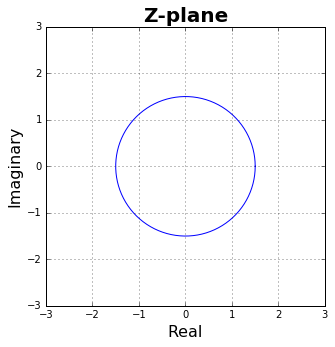

In [5]:
r = 1.5
theta = numpy.linspace(0,2*math.pi,100)
z_circ = r*numpy.cos(theta) + r*numpy.sin(theta)*1j

# plot
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(z_circ.real,z_circ.imag);

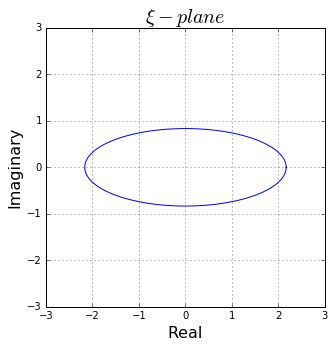

In [6]:
c = 1
xi = joukowski(z_circ,c)

chi = xi.real
eta = xi.imag

pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi-plane$',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(chi,eta);

** Part 2 **

In the next example we transform a circle with a radius between c and 2c centered slightly off of the origin from the z to $\xi$-plane. The Joukowski transformation creates a symmetric airfoil shape at zero angle of attack

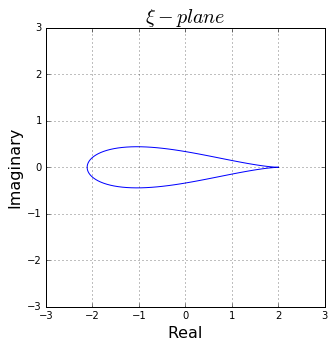

In [7]:
r = 1.2
c = 1
xc = c-r
yc = 0

z_circ = r*numpy.cos(theta) + xc + (r*numpy.sin(theta) + yc)*1j
xi = joukowski(z_circ,c)

pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi-plane$',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(xi.real,xi.imag);

** Part 3 **

Finally we transform a circle centered slightly off from the origin in both the x and y-direction with a radius defined by the offset and the value of c. In the $\xi$-plane this creates a cambered airfoil

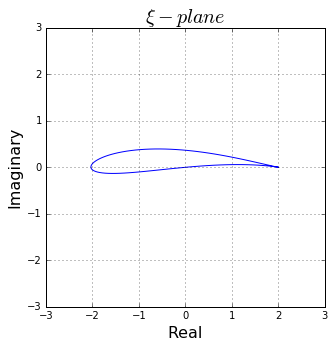

In [8]:
c = 1
xc = -0.1
yc = 0.1
r = numpy.sqrt((c-xc)**2+yc**2)

z_circ = r*numpy.cos(theta) + xc + (r*numpy.sin(theta) + yc)*1j
xi = joukowski(z_circ,c)

pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi-plane$',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(xi.real,xi.imag);

** Part 4 **

The point that corresponds to the trailing edge of the airfoil is at $\theta$ = 0

## 3. Grid points on the z-plane using polar coordinates

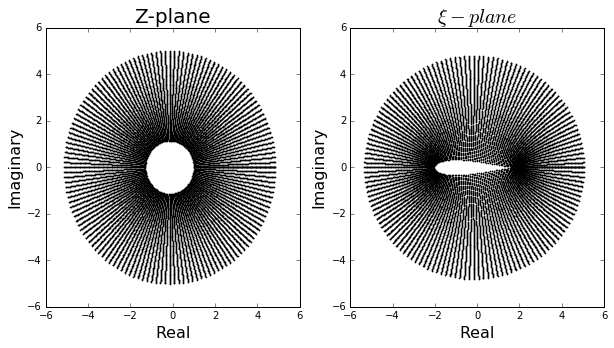

In [19]:
c = 1
R = 1.15
xc = -0.15
yc = 0

N_r = 100
N_theta = 145

theta = numpy.linspace(0,2*math.pi,N_theta)
r = numpy.linspace(R,5,N_r)

Rad, Theta = numpy.meshgrid(r,theta)

z = Rad*numpy.cos(Theta) + xc + (Rad*numpy.sin(Theta) + yc)*1j
xi = joukowski(z,c)

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.scatter(z.real,z.imag,color='k',s=0.5,marker='o')

pyplot.subplot(122)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi-plane$',fontsize=20)
pyplot.scatter(xi.real,xi.imag,color='k',s=0.5,marker='o');

## 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

### Stream functions and streamlines


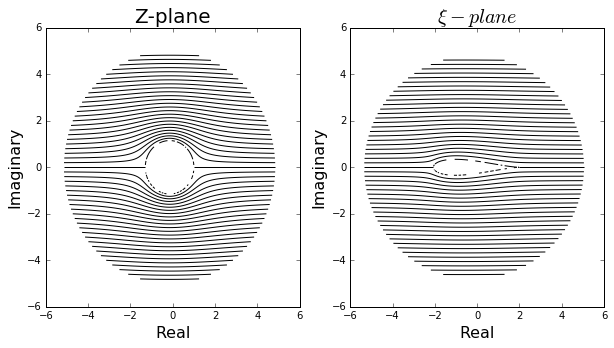

In [20]:
u_inf = 1.0
kappa = 2*R**2*math.pi*u_inf

psi_doublet = get_stream_function_doublet(kappa,xc,yc,z.real,z.imag)
psi_freestream = u_inf*z.imag

psi = psi_doublet + psi_freestream

levels = numpy.linspace(-psi.max(),psi.max(),51)

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.contour(z.real, z.imag, psi, levels=levels, colors='k', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi-plane$',fontsize=20)
pyplot.contour(xi.real, xi.imag, psi, levels=levels, colors='k', linewidths=1, linestyles='solid');

In [21]:
u_doublet, v_doublet = get_velocity_doublet(kappa,xc,yc,z.real,z.imag)

u_freestream = u_inf*numpy.ones(numpy.shape(z.real))
v_freestream = numpy.zeros(numpy.shape(z.imag))

u = u_doublet + u_freestream
v = v_doublet + v_freestream



In [25]:
numpy.shape(z.real)

(145, 100)